<a href="https://colab.research.google.com/github/matheusfabiao/Atividade-Ailza/blob/main/AtividadeAilza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalando o módulo wget usando o gerenciador de pacotes pip
!pip3 install wget
# Baixando o arquivo CSV usando wget
!wget https://raw.githubusercontent.com/matheusfabiao/Atividade-Ailza/main/FuelConsumptionCo2.csv

--2023-11-23 13:43:18--  https://raw.githubusercontent.com/matheusfabiao/Atividade-Ailza/main/FuelConsumptionCo2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/plain]
Saving to: ‘FuelConsumptionCo2.csv.4’

FuelConsumptionCo2. 100%[===================>]  70.93K  --.-KB/s    in 0.02s   

2023-11-23 13:43:19 (3.54 MB/s) - ‘FuelConsumptionCo2.csv.4’ saved [72629/72629]



In [2]:
# Ignorar Avisos
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [4]:
# Lendo o arquivo CSV usando a biblioteca pandas e armazenando os dados em um DataFrame
df = pd.read_csv('FuelConsumptionCo2.csv')

# Simplificando para obter apenas os 10 primeiros registros do DataFrame
# Exibindo o DataFrame para visualizar os primeiros registros e entender a estrutura dos dados
df = df.head(10)
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [5]:
# Criando um novo DataFrame 'motores' contendo apenas a coluna 'ENGINESIZE'
motores = df[['ENGINESIZE']]

# Criando um novo DataFrame 'co2' contendo apenas a coluna 'CO2EMISSIONS'
co2 = df[['CO2EMISSIONS']]

# Exibindo as primeiras linhas do DataFrame 'motores' para visualizar os dados da coluna 'ENGINESIZE'
motores.head()

,ENGINESIZE
0,2.0
1,2.4
2,1.5
3,3.5
4,3.5


In [6]:
# Juntando os DataFrames 'motores' e 'co2' com base no índice
novo_dataset = pd.concat([motores, co2], axis=1)

# Apresentação do novo DataFrame
novo_dataset

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
5,3.5,230
6,3.5,232
7,3.7,255
8,3.7,267
9,2.4,212


In [7]:
# Utilizando o método describe() para gerar estatísticas descritivas do DataFrame
# Essas estatísticas incluem contagem, média, desvio padrão, mínimo, quartis e máximo
novo_dataset.describe()

,ENGINESIZE,CO2EMISSIONS
count,10.000000,10.000000
mean,2.970000,224.800000
std,0.812472,37.926244
min,1.500000,136.000000
25%,2.400000,214.250000
50%,3.500000,231.000000
75%,3.500000,252.250000
max,3.700000,267.000000


In [8]:
# Utilizando o método info() para obter informações sobre o DataFrame, como tipos de dados e valores não nulos
novo_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ENGINESIZE    10 non-null     float64
 1   CO2EMISSIONS  10 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 288.0 bytes


In [9]:
# Estimação do modelo
modelo = sm.OLS(novo_dataset["ENGINESIZE"], sm.add_constant(novo_dataset["CO2EMISSIONS"])).fit()

# Adicione a coluna 'Fitted Values' ao DataFrame novo_dataset
novo_dataset["Fitted Values"] = modelo.fittedvalues

# Gráfico de dispersão com Plotly
fig = px.scatter(novo_dataset, x="CO2EMISSIONS", y="ENGINESIZE", title="Scatter Plot")
fig.update_traces(marker=dict(color="#39568C", size=2.5))
fig.add_trace(px.scatter(novo_dataset, x="CO2EMISSIONS", y="Fitted Values").data[0])

# Adicionando a linha de regressão linear
fig.add_trace(go.Scatter(
    x=novo_dataset["CO2EMISSIONS"],
    y=modelo.fittedvalues,
    mode='lines',
    line=dict(color='red', width=2),
    name='Linha de Regressão Linear'
))

fig.update_layout(
    xaxis_title="Emissão de CO2",
    yaxis_title="Tamanho do Motor",
    legend_title="Legenda",
    showlegend=True
)
fig.show()

In [10]:
# Coeficiente de ajuste (R²) é a correlação ao quadrado
print(np.corrcoef(novo_dataset["ENGINESIZE"], novo_dataset["CO2EMISSIONS"])[0, 1]**2)

0.8358170685160559


In [11]:
# Estimação do modelo
modelo = sm.OLS(novo_dataset["ENGINESIZE"], sm.add_constant(novo_dataset["CO2EMISSIONS"])).fit()

# Observando os parâmetros do modelo
print(modelo.summary())

# Salvando fitted values (variável yhat: modelo estimado) e residuals (variável erro) no dataset
novo_dataset["yhat"] = modelo.fittedvalues
novo_dataset["erro"] = modelo.resid

                            OLS Regression Results                            
Dep. Variable:             ENGINESIZE   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     40.73
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           0.000213
Time:                        13:43:21   Log-Likelihood:                -2.5520
No. Observations:                  10   AIC:                             9.104
Df Residuals:                       8   BIC:                             9.709
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.4327      0.699     -2.051   

In [12]:
# Visualizando a base de dados com as variáveis yhat (y estimado) e erro
novo_dataset[["ENGINESIZE", "CO2EMISSIONS", "yhat", "erro"]]

,ENGINESIZE,CO2EMISSIONS,yhat,erro
0,2.0,196,2.405951,-0.405951
1,2.4,221,2.895577,-0.495577
2,1.5,136,1.230849,0.269151
3,3.5,255,3.561468,-0.061468
4,3.5,244,3.346033,0.153967
5,3.5,230,3.071842,0.428158
6,3.5,232,3.111012,0.388988
7,3.7,255,3.561468,0.138532
8,3.7,267,3.796488,-0.096488
9,2.4,212,2.719312,-0.319312


In [13]:
# Gráfico didático para visualizar o conceito de R²
fig = px.scatter(novo_dataset, x="CO2EMISSIONS", y="ENGINESIZE", title="Scatter Plot with R² Concept")
fig.update_traces(marker=dict(color="#39568C", size=2.5))
fig.add_trace(px.scatter(novo_dataset, x="CO2EMISSIONS", y=novo_dataset["Fitted Values"]).data[0])

# Adicionando a linha de regressão linear
fig.add_trace(go.Scatter(
    x=novo_dataset["CO2EMISSIONS"],
    y=modelo.fittedvalues,
    mode='lines',
    line=dict(color='red', width=2),
    name='Linha de Regressão Linear'
))

# Adicionando as linhas para o conceito de R²
fig.add_shape(type='line', x0=novo_dataset["CO2EMISSIONS"].min(), x1=novo_dataset["CO2EMISSIONS"].max(), y0=novo_dataset["ENGINESIZE"].mean(), y1=novo_dataset["ENGINESIZE"].mean(), line=dict(color="rgb(169,169,169)", width=0.5))
fig.add_shape(type='line', x0=novo_dataset["CO2EMISSIONS"], x1=novo_dataset["CO2EMISSIONS"], y0=novo_dataset["Fitted Values"], y1=novo_dataset["ENGINESIZE"], line=dict(color="#55C667", width=0.7, dash="dashdot"))
fig.add_shape(type='line', x0=novo_dataset["CO2EMISSIONS"], x1=novo_dataset["CO2EMISSIONS"], y0=novo_dataset["ENGINESIZE"], y1=novo_dataset["Fitted Values"], line=dict(color="#440154", width=0.7, dash="dashdot"))

fig.update_layout(
    xaxis_title="Emissão de CO2",
    yaxis_title="Tamanho do Motor",
    legend_title="Legenda",
    showlegend=True
)
fig.show()

In [14]:
# Coeficiente de ajuste (R²) é a correlação ao quadrado
print(np.corrcoef(novo_dataset["ENGINESIZE"], novo_dataset["CO2EMISSIONS"])[0, 1]**2)

0.8358170685160559


In [15]:
# Modelo auxiliar para mostrar R² igual a 100% (para fins didáticos)
# O yhat (estimado) é a variável dependente
modelo_auxiliar = sm.OLS(novo_dataset["yhat"], sm.add_constant(novo_dataset["CO2EMISSIONS"])).fit()
print(modelo_auxiliar.summary())

                            OLS Regression Results                            
Dep. Variable:                   yhat   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.848e+30
Date:                Thu, 23 Nov 2023   Prob (F-statistic):          9.60e-119
Time:                        13:43:21   Log-Likelihood:                 327.37
No. Observations:                  10   AIC:                            -650.7
Df Residuals:                       8   BIC:                            -650.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.4327   3.28e-15  -4.37e+14   

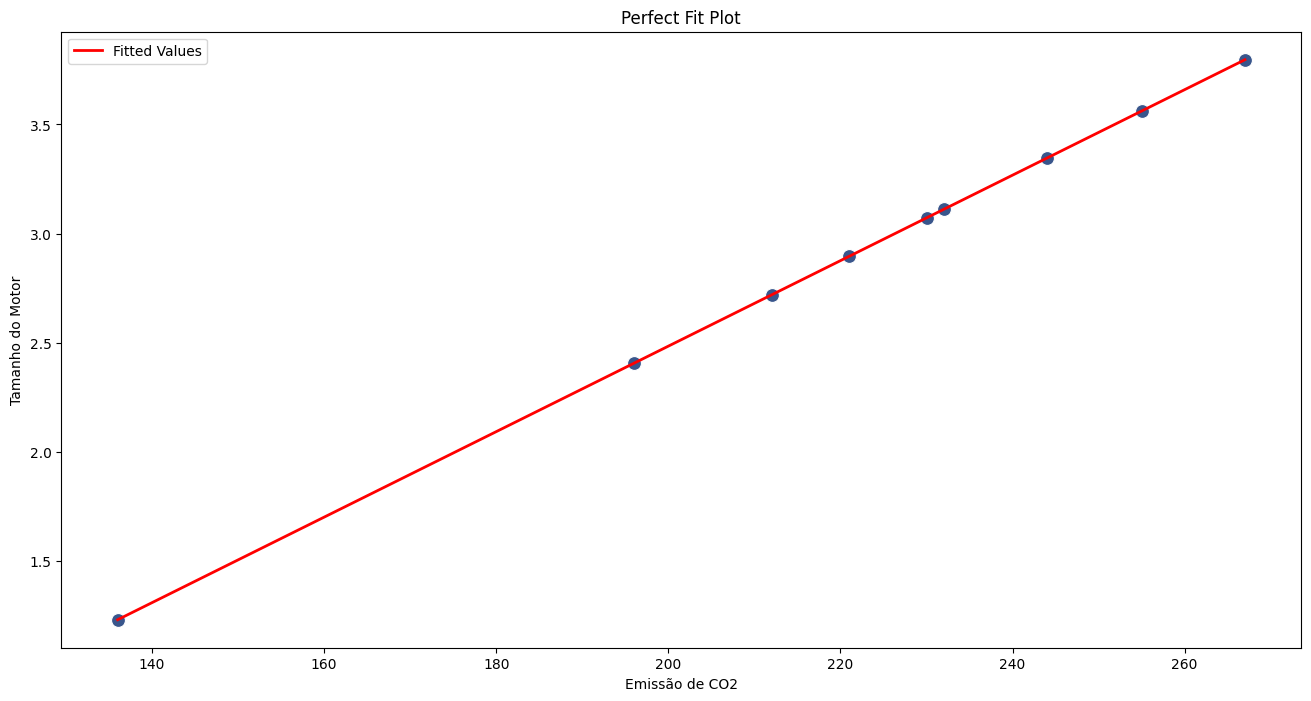

In [16]:
# Gráfico mostrando o perfect fit
plt.figure(figsize=(16, 8))
sns.scatterplot(x="CO2EMISSIONS", y="yhat", data=novo_dataset, color="#39568CFF", s=100)
sns.lineplot(x=novo_dataset["CO2EMISSIONS"], y=novo_dataset["yhat"], color="red", label="Fitted Values", linewidth=2)
plt.title("Perfect Fit Plot")
plt.xlabel("Emissão de CO2")
plt.ylabel("Tamanho do Motor")
plt.legend()
plt.show()